In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\proj\kaggle\house price prediction\ParisHousing.csv")

In [3]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [4]:
df1=df.drop(['hasYard','hasPool','cityCode','cityPartRange'],axis=1)

In [5]:
#df.head(5)
df1.drop(['numPrevOwners','made','isNewBuilt','hasStormProtector'],axis=1,inplace=True)


In [6]:
df1.head(5)

,squareMeters,numberOfRooms,floors,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,63,4313,9005,956,0,7,7559081.5
1,80771,39,98,3653,2436,128,1,2,8085989.5
2,55712,58,19,2937,8852,135,1,9,5574642.1
3,32316,47,6,659,7141,359,0,3,3232561.2
4,70429,19,90,8435,2429,292,1,4,7055052.0


In [7]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [9]:
df['cityPartRange']

0        3
1        8
2        6
3       10
4        3
        ..
9995     7
9996     9
9997    10
9998     1
9999     6
Name: cityPartRange, Length: 10000, dtype: int64

In [10]:
df1.head(5)

,squareMeters,numberOfRooms,floors,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,63,4313,9005,956,0,7,7559081.5
1,80771,39,98,3653,2436,128,1,2,8085989.5
2,55712,58,19,2937,8852,135,1,9,5574642.1
3,32316,47,6,659,7141,359,0,3,3232561.2
4,70429,19,90,8435,2429,292,1,4,7055052.0


In [11]:
#X=np.array(['squareMeters','numberOfRooms','floors','basement','attic','garage','hasStorageRoom','hasGuestRoom'])
#y=np.array(['price'])

In [12]:
A=df1[['squareMeters','numberOfRooms','floors','basement','attic','garage','hasStorageRoom','hasGuestRoom']]
B=df1[['price']]


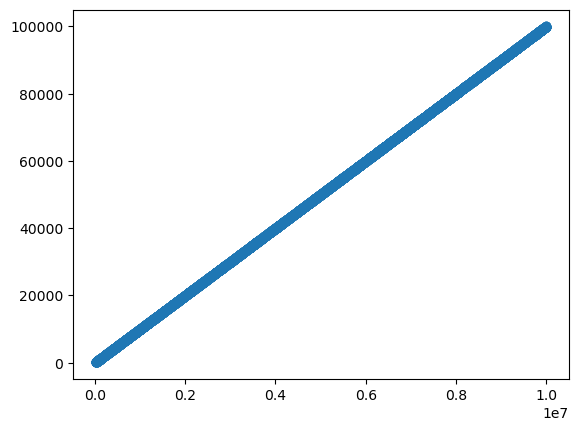

In [54]:
x=df1['squareMeters']
y=df1['price']
plt.scatter(y,x)

In [14]:
print(len(A))

10000


In [15]:
A.shape

(10000, 8)

In [17]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.33, random_state=42)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [56]:
X_train.shape[0]

6700



The prediction of the model for that example
𝑓𝑤𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏
 
The cost for that example
𝑐𝑜𝑠𝑡(𝑖)=(𝑓𝑤𝑏−𝑦(𝑖))2
 
Return the total cost over all examples
𝐽(𝐰,𝑏)=12𝑚∑𝑖=0𝑚−1𝑐𝑜𝑠𝑡(𝑖)
 
Here,  𝑚
  is the number of training examples and  ∑
  is the summation operator

In [109]:
def compute_cost(x, y, w, b): 
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb = np.dot(w ,x[i]) + b
        cost1=(f_wb - y[i])**2
        cost=cost+cost1
    total_cost=(1/(2*m))*cost
    return(total_cost)

In [117]:
initial_w = 1
initial_b = 2
cost = compute_cost(np.array(X_train), np.array(y_train), initial_w, initial_b)
cost = cost.mean().item()
print(f'Cost at initial w: {cost:.3f}')




Cost at initial w: 16365652272167.920


In [72]:
np.array(X_train)

array([28303, 54060, 11084, ..., 98710, 17051,  3649], dtype=int64)

In [74]:
np.array(y_train)

array([2833274.6, 5414753. , 1113370.8, ..., 9877813.4, 1710016.3,
        375031.3])

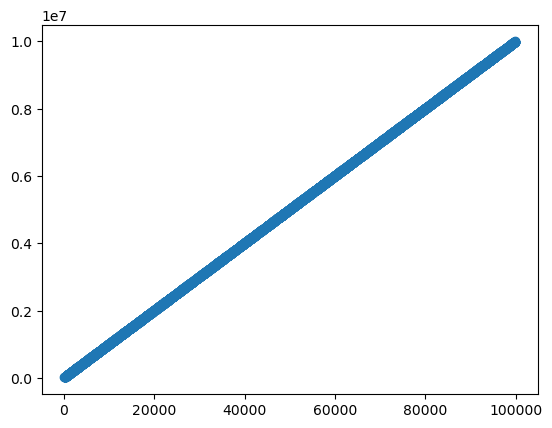

In [92]:
plt.scatter(X_train,y_train)

In [101]:
h=np.array(A)
i=np.array(B)

In [102]:
h

array([[75523,     3,    63, ...,   956,     0,     7],
       [80771,    39,    98, ...,   128,     1,     2],
       [55712,    58,    19, ...,   135,     1,     9],
       ...,
       [83841,     3,    69, ...,   345,     1,     9],
       [59036,    70,    96, ...,   339,     1,     4],
       [ 1440,    84,    49, ...,   278,     1,     6]], dtype=int64)

In [103]:
i

array([[7559081.5],
       [8085989.5],
       [5574642.1],
       ...,
       [8390030.5],
       [5905107. ],
       [ 146708.4]])

In [118]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = reg.predict(X_test)

# Obtain the coefficients and intercept of the fitted model
w = reg.coef_
b = reg.intercept_


In [119]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.3f}')


Mean Squared Error: 8090071.528


In [120]:
r2 = reg.score(X_test, y_test)
print(f'R-squared: {r2:.3f}')


R-squared: 1.000
